<a href="https://colab.research.google.com/github/yponomareva/project-a/blob/main/Autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.9 MB 22.6 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=1b86354c5f30a5f70a2b89b7f9cb5269197fe701005856269b88956d1414a820
  Stored in directory: /tmp/pip-ephem-wheel-cache-pj5s6wf2/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5acd

In [3]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport
from joblib import dump

In [4]:
# Скачивание датасета
path = kagglehub.dataset_download("andrewmvd/autism-screening-on-adults")

# Посмотреть список файлов в директории
print("Files in dataset:", os.listdir(path))


100%|██████████| 7.38k/7.38k [00:00<00:00, 11.9MB/s]

Extracting files...
Files in dataset: ['autism_screening.csv']


In [5]:
file_path = os.path.join(path, "autism_screening.csv")

# Чтение CSV-файла
data = pd.read_csv(file_path)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [7]:
data.head(100)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,0,0,1,0,1,...,f,White-European,no,no,United Kingdom,no,4.0,18 and more,Self,NO
96,1,0,0,0,1,0,1,1,0,0,...,f,White-European,no,no,Australia,no,4.0,18 and more,Self,NO
97,1,0,0,1,1,0,1,0,0,0,...,m,Others,no,no,New Zealand,no,4.0,18 and more,Self,NO
98,1,1,0,0,0,0,0,1,0,0,...,f,Pasifika,no,no,Tonga,no,3.0,18 and more,Self,NO


In [8]:
profile = ProfileReport(data,
                        title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 43.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Удаление лишних признаков
data = data.drop(columns=['ethnicity', 'jundice', 'contry_of_res', 'used_app_before', 'age_desc', 'relation'])

In [ ]:
data.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,yes,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,yes,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,2.0,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,no,9.0,YES
6,0,1,0,0,0,0,0,1,0,0,17.0,f,no,2.0,NO
7,1,1,1,1,0,0,0,0,1,0,64.0,m,no,5.0,NO
8,1,1,0,0,1,0,0,1,1,1,29.0,m,no,6.0,NO
9,1,1,1,1,0,1,1,1,1,0,17.0,m,yes,8.0,YES


In [10]:
# Преобразование бинарных признаков в 0/1
binary_cols = ['austim', 'Class/ASD']
binary_mapping = {'YES': 1, 'NO': 0, 'yes': 1, 'no': 0}
for col in binary_cols:
    data[col] = data[col].map(binary_mapping).astype(int)

# Кодирование категориальных признаков
categorical_cols = ['gender']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

In [11]:
print("\nСтатистика данных:")
print(data.describe(include='all'))


Статистика данных:
          A1_Score    A2_Score    A3_Score    A4_Score    A5_Score  \
count   704.000000  704.000000  704.000000  704.000000  704.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.721591    0.453125    0.457386    0.495739    0.498580   
std       0.448535    0.498152    0.498535    0.500337    0.500353   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       1.000000    0.000000    0.000000    0.000000    0.000000   
75%       1.000000    1.000000    1.000000    1.000000    1.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          A6_Score    A7_Score    A8_Score    A9_Score   A10_Score  \
count   704.000000  704.000000  704.000000  704.000000  704.000000   

<ipython-input-12-5654de84d936>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class/ASD', data=data, palette='viridis')


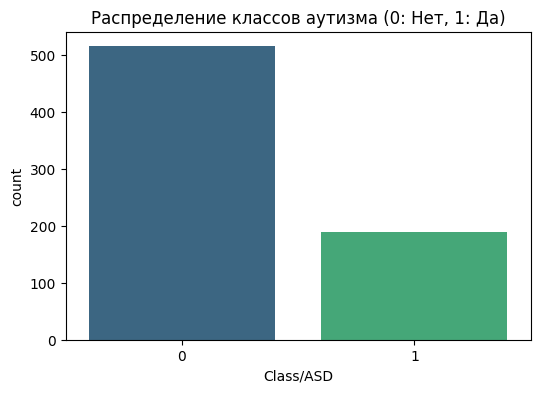

In [12]:
#Распределение результатов теста
plt.figure(figsize=(6, 4))
sns.countplot(x='Class/ASD', data=data, palette='viridis')
plt.title('Распределение классов аутизма (0: Нет, 1: Да)')
plt.show()

<ipython-input-13-c21b83d33447>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='austim', data=data, palette='viridis')


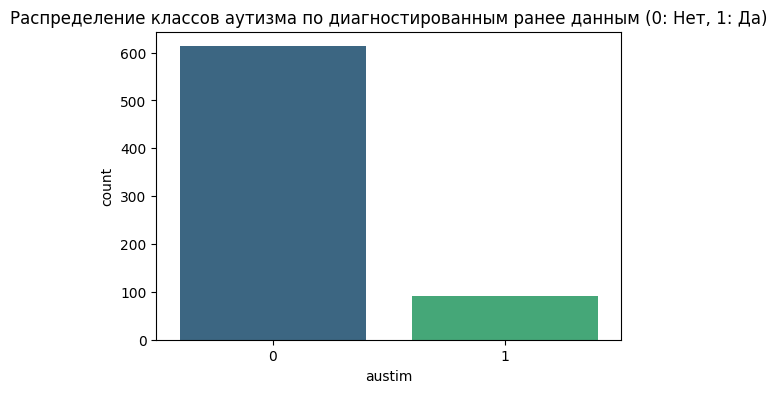

In [13]:
#Распределение диагностированного РАС
plt.figure(figsize=(6, 4))
sns.countplot(x='austim', data=data, palette='viridis')
plt.title('Распределение классов аутизма по диагностированным ранее данным (0: Нет, 1: Да)')
plt.show()

In [15]:
#Удаление записей с выбросами
data = data[data['age'] < 85]

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


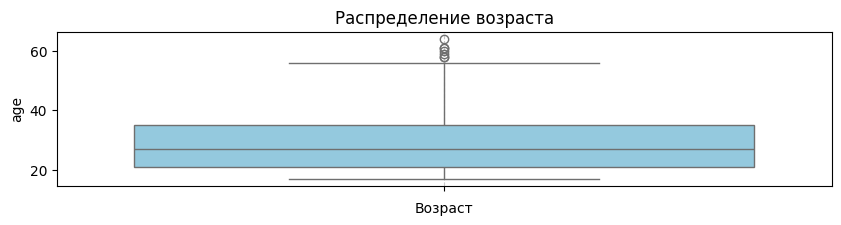

In [16]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=data, y='age', orient='h', color='skyblue')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

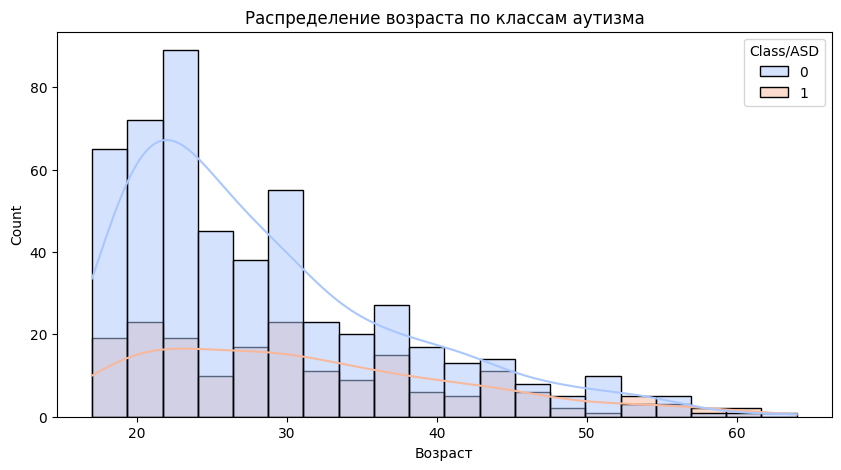

In [17]:
#Распределение возраста (после очистки данных)
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='age', hue='Class/ASD', bins=20, kde=True, palette='coolwarm')
plt.title('Распределение возраста по классам аутизма')
plt.xlabel('Возраст')
plt.show()

In [18]:
#Удаляем лишние признаки
data =  data.drop('gender', axis=1)
data =  data.drop('result', axis=1)

In [19]:
data =  data.drop('Class/ASD', axis=1)

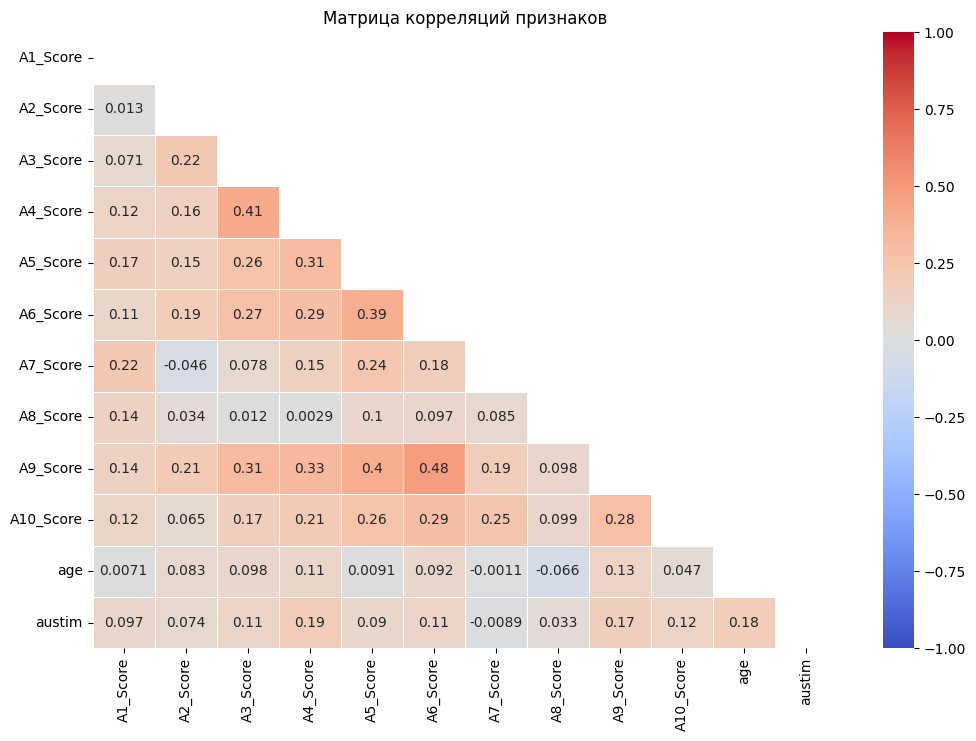

In [21]:
#Корреляция признаков

plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Матрица корреляций признаков')
plt.show()

In [22]:
# Загрузка данных
X = data.drop('austim', axis=1)
y = data['austim']

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.7,
    stratify=y,
    random_state=42
)

# ------------------------------------------------------------------------------------
# 1. Gradient Boosting (XGBoost)
# ------------------------------------------------------------------------------------
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    scale_pos_weight=(len(y) - sum(y)) / sum(y),  # Для дисбаланса классов
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))


XGBoost Results:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       427
           1       0.21      0.38      0.27        64

    accuracy                           0.73       491
   macro avg       0.55      0.58      0.55       491
weighted avg       0.80      0.73      0.76       491

ROC-AUC: 0.6535238583138173



Random Forest Results:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       427
           1       0.29      0.34      0.32        64

    accuracy                           0.81       491
   macro avg       0.60      0.61      0.60       491
weighted avg       0.82      0.81      0.81       491

ROC-AUC: 0.6580064402810304


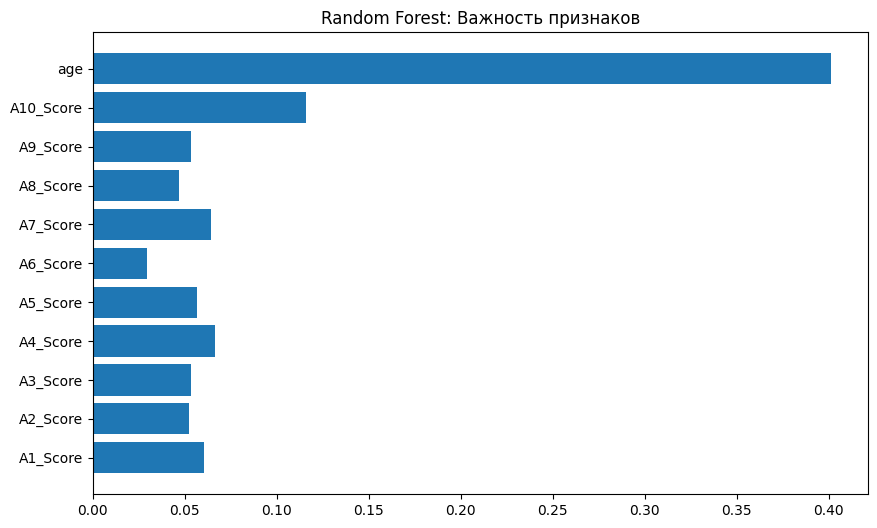

In [23]:
# ------------------------------------------------------------------------------------
# 2. Random Forest
# ------------------------------------------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Важность признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_model.feature_importances_)
plt.title('Random Forest: Важность признаков')
plt.show()

In [24]:
# ------------------------------------------------------------------------------------
# 3. Logistic Regression + Feature Selection
# ------------------------------------------------------------------------------------
# Отбор признаков через L1-регуляризацию
feature_selector = SelectFromModel(
    LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=0.1,
        random_state=42
    ),
    max_features=10  # Выбираем топ-10 признаков
)

# Создаем пайплайн
lr_pipeline = Pipeline([
    ('feature_selection', feature_selector),
    ('classifier', LogisticRegression(random_state=42))
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr_pipeline.predict_proba(X_test)[:, 1]))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       427
           1       0.50      0.02      0.03        64

    accuracy                           0.87       491
   macro avg       0.69      0.51      0.48       491
weighted avg       0.82      0.87      0.81       491

ROC-AUC: 0.66772175058548


In [25]:
# Пример данных нового элемента
dict_data = [{
    'A1_Score': 1,
    'A2_Score': 1,
    'A3_Score': 0,
    'A4_Score': 0,
    'A5_Score': 0,
    'A6_Score': 1,
    'A7_Score': 0,
    'A8_Score': 1,
    'A9_Score': 1,
    'A10_Score': 0,
    'age': 29.0

}]

In [26]:
new_data = pd.DataFrame(dict_data)
new_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age
0,1,1,0,0,0,1,0,1,1,0,29.0


In [27]:
# Сохранение модели
joblib.dump(lr_pipeline, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [28]:
# Загрузка модели
loaded_model = joblib.load('logistic_regression_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [29]:
new_data_processed = loaded_scaler.transform(new_data)

In [30]:
# Предсказание
prediction = loaded_model.predict(new_data_processed)
if prediction == 1:
  print('Есть подозрение на РАС, проконсультируйтесь с врачом')
else:
  print('Скорее всего, вы здорорвы')

Скорее всего, вы здорорвы
